#### Import Numpy

In [60]:
import numpy as np

#### Helper function that converts one rbg pixel into an hsv pixel

In [61]:

def rgb_to_hsv(rgb):
    # Input: rgb is an 1-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0], b = rgb[1], g = rgb[2]
    # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,360], s = [0,1], v = [0,1].

    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255

    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff
    
    # Return hsv values.
    return np.float32([h,s,v])

#### Run through the 3d array, converting each pixel using the helper function, and after converting to opencv's range

In [62]:

def rgb_to_hsv3D(rgb):
    # 
    hsv = np.float32([[[]]])
    for i in rgb:
        for j in i:
            # Convert to hsv value
            j = rgb_to_hsv(j)
            # Split into seperate variables
            h = j[0]
            s = j[1]
            v = j[2]
            
            # convert to openCV format
            h = round(h / 2)
            s = round(s * 255)
            v = round(v * 255)
            
            # recreate pixel
            j = np.float32([h,s,v])

            # add to hsv array
            hsv = np.append(hsv, j)
    # reshape hsv pixel array to match rgb
    hsv = hsv.reshape(rgb.shape)
    return hsv

#### Helper function to convert hsv pixel to rgb

In [63]:

def hsv_to_rgb(hsv):
    # c = v * s
    c = hsv[2] * hsv[1]
    # x = c * (1 - |(h/60) mod 2 - 1|)
    x = c * (1-abs((hsv[0]/60)%2 - 1))
    # m = v - c
    m = hsv[2] - c

    # initialize rgb values
    r,g,b = 0,0,0
    #set rgb values
    if hsv[0] < 60:
        r,g,b = c,x,0
    elif hsv[0] < 120:
        r,g,b = x,c,0
    elif hsv[0] < 180:
        r,g,b = 0,c,x
    elif hsv[0] < 240:
        r,g,b = 0,x,c
    elif hsv[0] < 300:
        r,g,b = x,0,c
    elif hsv[0] < 360:
        r,g,b = c,0,x
    # add m to each value and convert to 0-255 range
    r,g,b = (r+m)*255, (g+m)*255, (b+m)*255
    return np.float32([r,g,b])


#### Loop through the 3D array, changing each pixel to rgb after converting from openCV's format

In [64]:
def hsv_to_rgb3D(hsv):
    # Create new empty array for rgb values
    rgb = np.uint8([[[]]])
    for i in hsv:
        for j in i:
            # Split pixel into seperate values
            h = j[0]
            s = j[1]
            v = j[2]
            
            # # Convert to regular values from openCV's values
            h = (h*2)
            s = (s/255)
            v = (v/255)
            
            # Add values into pixel
            j = np.float32([h,s,v])

            # convert to rgb from hsv
            j = hsv_to_rgb(j)
            rgb = np.append(rgb, j)
    # reshape rgb picture to match hsv
    rgb = rgb.reshape(hsv.shape)
    return rgb

#### Function tests

In [65]:
rgb = np.uint8([[[200,74,55]]])

hsv = rgb_to_hsv3D(rgb)

newRgb = hsv_to_rgb3D(hsv)

print('The original rgb value is: ', rgb)
print('The hsv value is: ', hsv)
print('The new rgb value is: ', newRgb)

The original rgb value is:  [[[200  74  55]]]
The hsv value is:  [[[  4. 185. 200.]]]
The new rgb value is:  [[[200.        74.24837   54.901962]]]


# Part 2

#### Import image

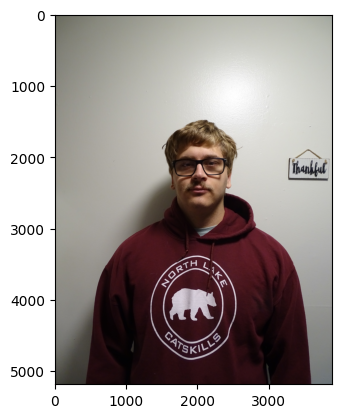

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
img = cv2.imread('Kyle.jpg')
# img = cv2.imread('face.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(img)

Full image's histogram

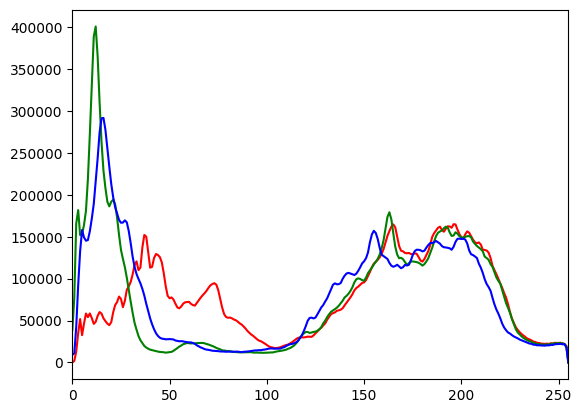

In [67]:
hist = cv2.calcHist([img], [0],None, [256], [0,255])
plt.plot(hist, color = 'red')
plt.xlim([0,255])

hist = cv2.calcHist([img], [1],None, [256], [0,255])
plt.plot(hist, color = 'green')
plt.xlim([0,255])

hist = cv2.calcHist([img], [2],None, [256], [0,255])
plt.plot(hist, color = 'blue')
plt.xlim([0,255])


plt.show()

#### Modify brightness and contrast

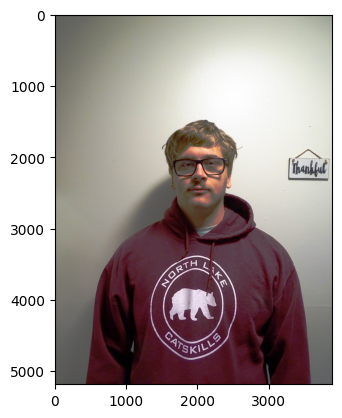

In [68]:
cdf = hist.cumsum()

cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)

# Histogram equalization equation.  Taken from wikipedia.
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Set values to uint8 and fill the look up table. 
cdf = np.ma.filled(cdf_m,0).astype('uint8')

imgContrast = cdf[img]

plt.imshow(imgContrast)

#### Masked image

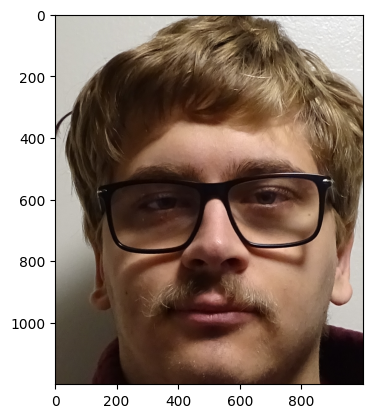

In [69]:
img_masked = img[1500:2700, 1500:2500]

plt.imshow(img_masked)

#### Make HSV histogram

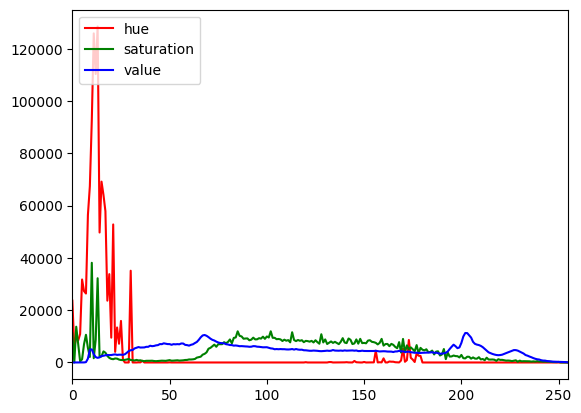

In [70]:
# takes too long
# img_hsv = hsv_to_rgb3D(img_masked)
img_hsv = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

hist = cv2.calcHist([img_hsv], [0],None, [256], [0,255])
plt.plot(hist, color = 'red')
plt.xlim([0,255])

hist = cv2.calcHist([img_hsv], [1],None, [256], [0,255])
plt.plot(hist, color = 'green')
plt.xlim([0,255])

hist = cv2.calcHist([img_hsv], [2],None, [256], [0,255])
plt.plot(hist, color = 'blue')
plt.xlim([0,255])

plt.legend(('hue','saturation','value'), loc = 'upper left')

plt.show()

#### Mask skin tones

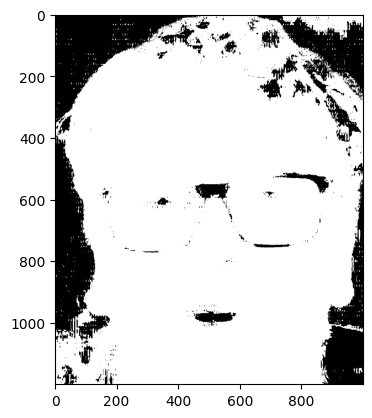

In [74]:
mask = cv2.inRange(img_hsv, np.array([0,0,0]), np.array([17,255,255]))

plt.imshow(mask, cmap = 'gray')

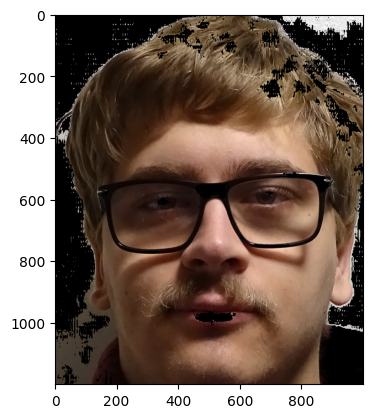

In [75]:
img_masked = cv2.bitwise_and(img_masked,img_masked, mask = mask)

plt.imshow(img_masked)